In [43]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from sklearn.neighbors import KNeighborsClassifier

In [44]:
def tableTraining(x, y, traing = 0.8, k = 5):
    #Datos
    n_len = len(x)
    i = int(n_len * traing)
    index = numpy.random.permutation(n_len)

    train_index, test_index = index[:i], index[i:]

    x_train = x[train_index, :]
    x_test = x[test_index, :]

    y_train = y[train_index]
    y_test = y[test_index]

    #Modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)

    return 1 - knn.score(x_test, y_test)



In [45]:
def fullTableTraining(x, y, k = 5):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x,y)

    return 1 - knn.score(x,y)

In [46]:
def oneLeftOut(x, y, k = 5):
    n_len = len(x)
    scores = []
    

    for i in range(n_len):
        x_train = numpy.delete(x, i, axis=0)
        y_train = numpy.delete(y, i, axis=0)

        x_test = [x[i]]
        y_test = [y[i]]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        scores.append(1 - knn.score(x_test, y_test))
        #print(scores[-1])

    return numpy.mean(scores) 

In [47]:
def KFolds(x, y, k=5,n_folds=5):
    index = numpy.random.permutation(len(x))
    folds = numpy.split(index, n_folds)
    
    scores = []

    for i in range(n_folds):
        index_train = numpy.concatenate([folds[j] for j in range(n_folds) if j!=i])
        index_test = folds[i]

        x_train, x_test = x[index_train], x[index_test]
        y_train, y_test = y[index_train], y[index_test]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)

        scores.append(1 - knn.score(x_test, y_test))

    return numpy.mean(scores)

[0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.0, 0.06666666666666665, 0.06666666666666665, 0.0, 0.033333333333333326, 0.06666666666666665]
[0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]


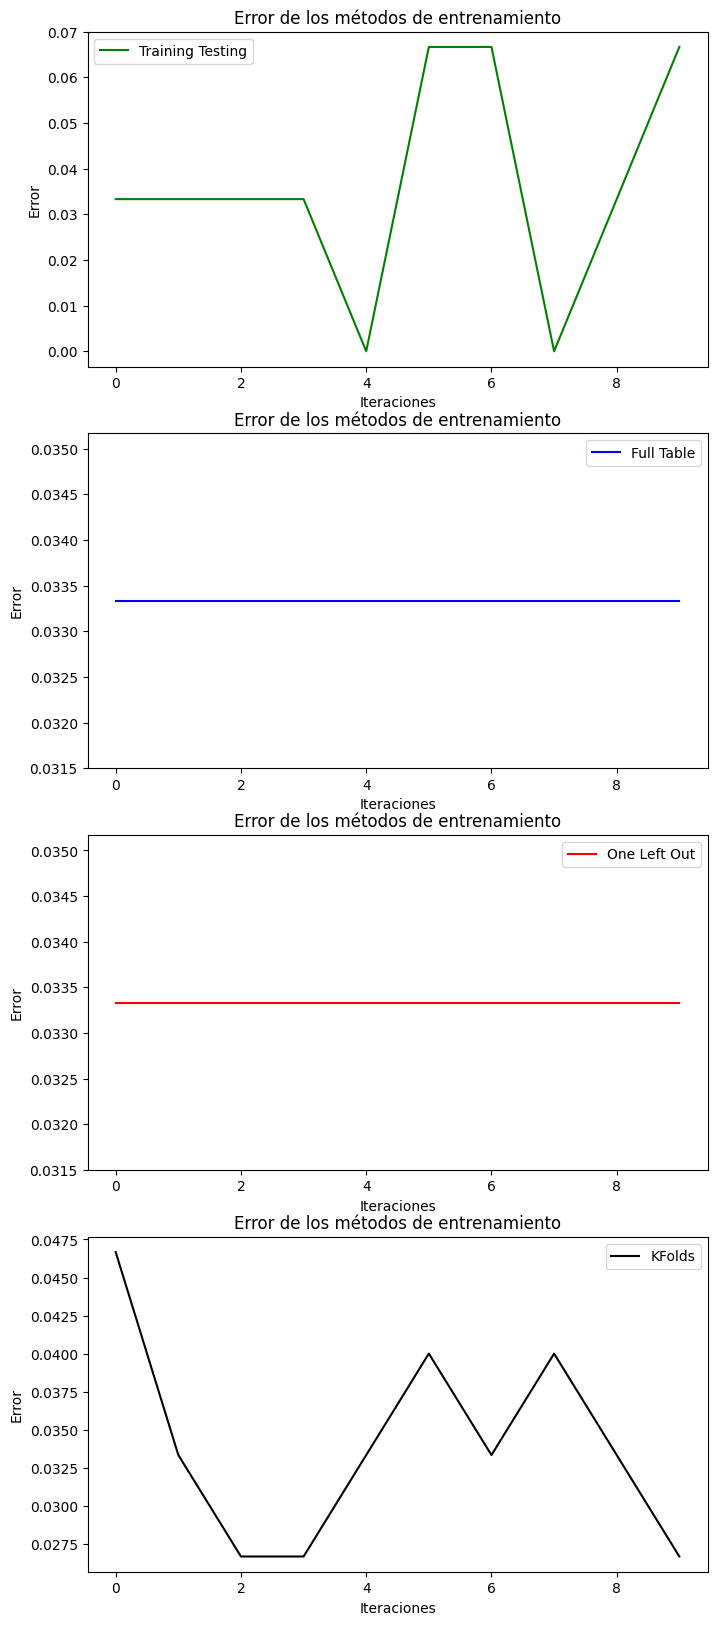

In [48]:
filename = "../iris.csv"
datos = pandas.read_csv(filename, delimiter=";", decimal=".")

x = numpy.column_stack((datos["s.largo"], datos["s.ancho"], datos["p.largo"], datos["p.ancho"]))
y = numpy.array(datos["tipo"])

tableTrainingErr_points = []
fullTableErr_points = []
OneLeftOutTableErr_points = []
KFoldsErr_points = []

epocas = 10
iteras = numpy.arange(epocas)

for i in iteras:
    tableTrainingErr_points.append(tableTraining(x,y))
    fullTableErr_points.append(fullTableTraining(x,y))
    OneLeftOutTableErr_points.append(oneLeftOut(x,y))
    KFoldsErr_points.append(KFolds(x,y))


print(tableTrainingErr_points)
print(fullTableErr_points)
print(OneLeftOutTableErr_points)

fig, ax = pyplot.subplots(nrows=4, figsize=(8,20))

ax[0].plot(iteras, tableTrainingErr_points, label = "Training Testing", color = "green")
ax[1].plot(iteras, fullTableErr_points, label = "Full Table", color = "blue")
ax[2].plot(iteras, OneLeftOutTableErr_points, label = "One Left Out", color = "red")
ax[3].plot(iteras, KFoldsErr_points, label = "KFolds", color = "black")

for i in range(4):
    ax[i].legend()
    ax[i].set_xlabel("Iteraciones") 
    ax[i].set_ylabel("Error") 
    ax[i].set_title("Error de los métodos de entrenamiento")

pyplot.show()
